# Heart Disease Prediction Model

### Objective

Create a machine learning model that will be able to predict the patient's likely to develop heart diseases based on their medical information. 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    mean_absolute_error, 
    mean_squared_error,
    r2_score
)
from sklearn import metrics

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# To supress warnings
import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Center Matplotlib plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
warnings.filterwarnings("ignore")

In [2]:
heart_df=pd.read_csv("dataset_heart.csv", index_col=False)
data=heart_df.copy()
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]
data.sample(10)

,age,sex_,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,ST_segment,major_vessels,thal,heart_disease
34,50,1,4,144,200,0,2,126,1,0.900,2,0,7,2
89,50,1,4,150,243,0,2,128,0,2.600,2,0,7,2
14,57,0,4,128,303,0,2,159,0,0.000,1,1,3,1
172,67,1,4,100,299,0,2,125,1,0.900,2,2,3,2
212,43,0,3,122,213,0,0,165,0,0.200,2,0,3,1
12,44,1,3,140,235,0,2,180,0,0.000,1,0,3,1
244,51,0,3,140,308,0,2,142,0,1.500,1,1,3,1
192,54,1,2,108,309,0,0,156,0,0.000,1,0,7,1
64,63,1,1,145,233,1,2,150,0,2.300,3,0,6,1
242,53,0,4,130,264,0,2,143,0,0.400,2,0,3,1


#### Data column description
1. age       
2. sex       
3. chest pain type  (4 values)       
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results  (values 0,1,2) 
8. maximum heart rate achieved  
9. exercise induced angina= = Chest pain caused by reduced blood flow to the heart muscles.        
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by flourosopy        
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target(Absence (1) or presence (2) of heart disease) 


In [3]:
data.shape

(270, 14)

- The data has 270 rows and 14 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex_                                  270 non-null    int64  
 2   chest_pain_type                       270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestoral                     270 non-null    int64  
 5   fasting_blood_sugar                   270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   max_heart_rate                        270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST_segment                            270 non-null    int64  
 11  major_vessels      

- Of the 14 columns, 13 are integer type with ST_segment being the only float type

In [5]:
#Mathematical Summary of columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.000,54.433,9.109,29.000,48.000,55.000,61.000,77.000
sex_,270.000,0.678,0.468,0.000,0.000,1.000,1.000,1.000
chest_pain_type,270.000,3.174,0.950,1.000,3.000,3.000,4.000,4.000
resting_blood_pressure,270.000,131.344,17.862,94.000,120.000,130.000,140.000,200.000
serum_cholestoral,270.000,249.659,51.686,126.000,213.000,245.000,280.000,564.000
fasting_blood_sugar,270.000,0.148,0.356,0.000,0.000,0.000,0.000,1.000
resting_electrocardiographic_results,270.000,1.022,0.998,0.000,0.000,2.000,2.000,2.000
max_heart_rate,270.000,149.678,23.166,71.000,133.000,153.500,166.000,202.000
exercise_induced_angina,270.000,0.330,0.471,0.000,0.000,0.000,1.000,1.000
oldpeak,270.000,1.050,1.145,0.000,0.000,0.800,1.600,6.200


#### Observations
* There is need to convert some fields into categorical variables. Those who show a 2 state(binary ) behaviour
* Convert the values (0:1, 1:2) for easier computations and save on memory.


In [6]:
#Cnverting the booking status to 1 or 0 for easier analysis
data_num= {"heart_disease":{2: 1, 1: 0}}

data=data.replace(data_num)
data.sample(10)

,age,sex_,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,ST_segment,major_vessels,thal,heart_disease
5,65,1,4,120,177,0,0,140,0,0.400,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.000,1,0,7,0
165,64,0,4,180,325,0,0,154,1,0.000,1,0,3,0
117,56,0,4,200,288,1,2,133,1,4.000,3,2,7,1
205,52,1,1,152,298,1,0,178,0,1.200,2,0,7,0
252,44,1,4,112,290,0,2,153,0,0.000,1,1,3,1
85,42,1,1,148,244,0,2,178,0,0.800,1,2,3,0
213,58,1,4,128,216,0,2,131,1,2.200,2,3,7,1
162,55,1,2,130,262,0,0,155,0,0.000,1,0,3,0
239,52,1,2,120,325,0,0,172,0,0.200,1,0,3,0


## Exploratory Data Analysis

### Univariate Analysis

In [7]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

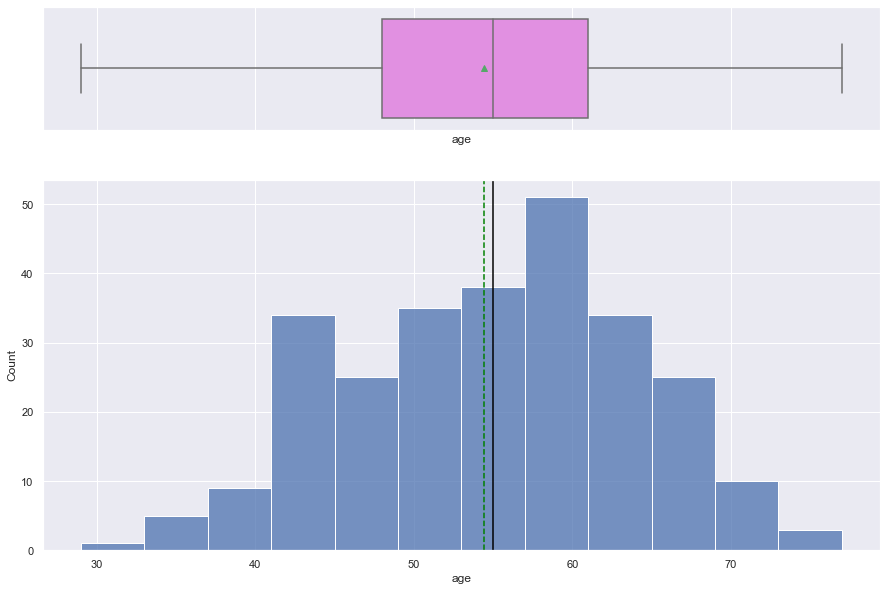

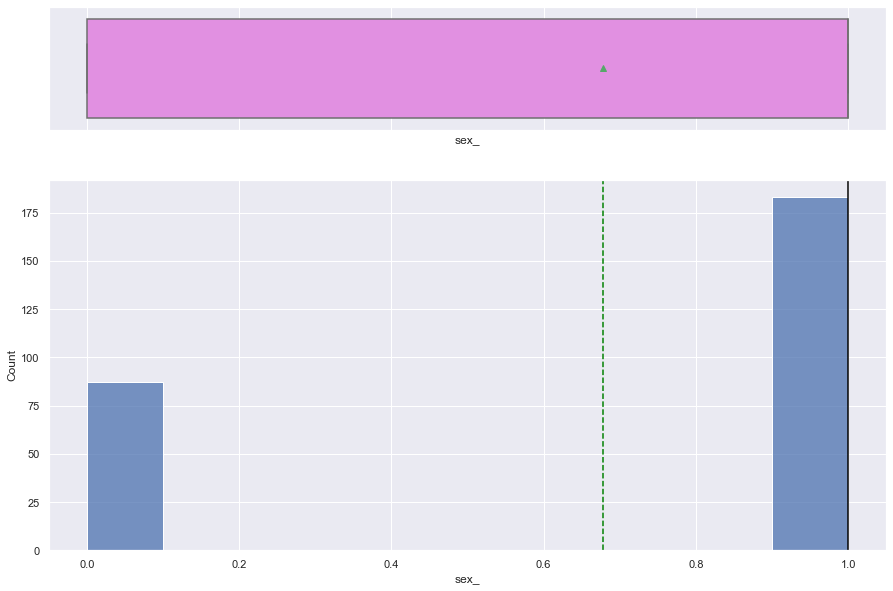

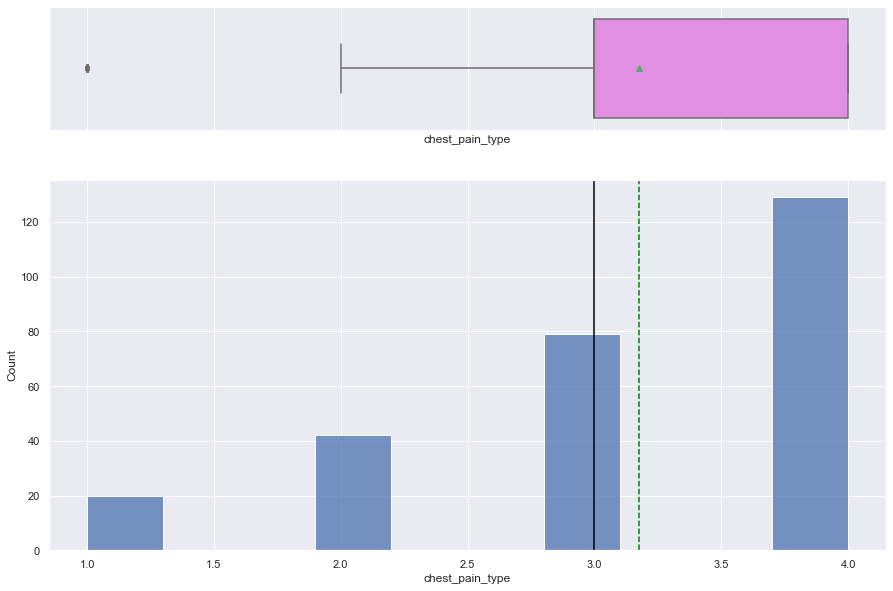

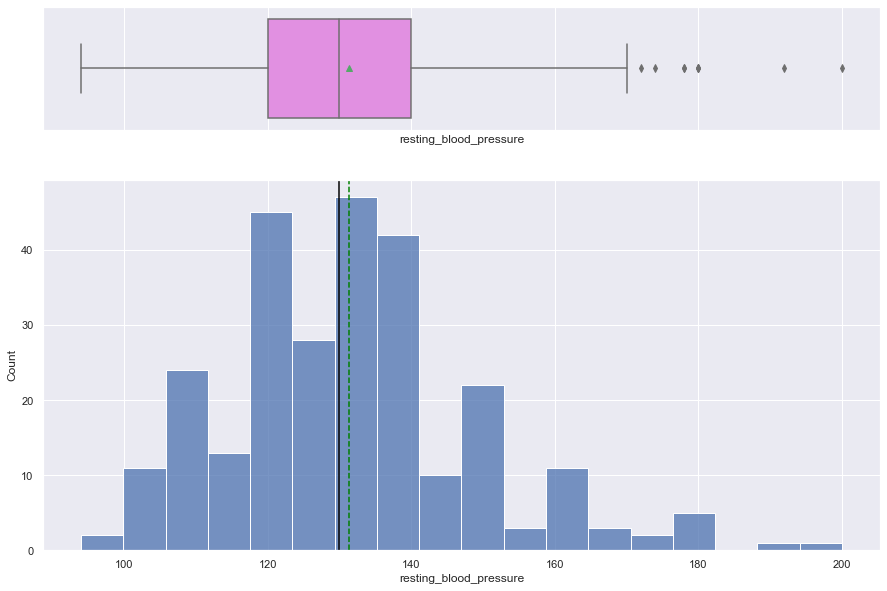

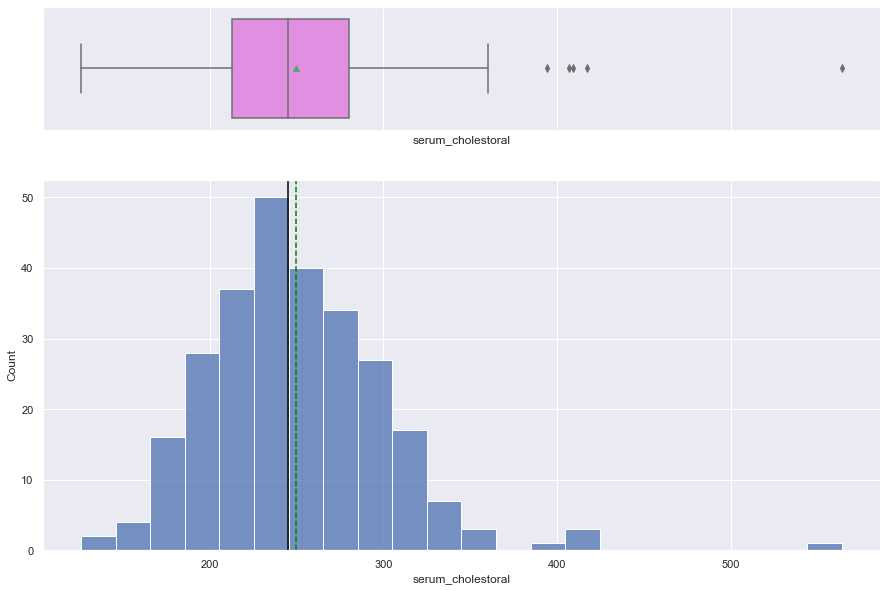

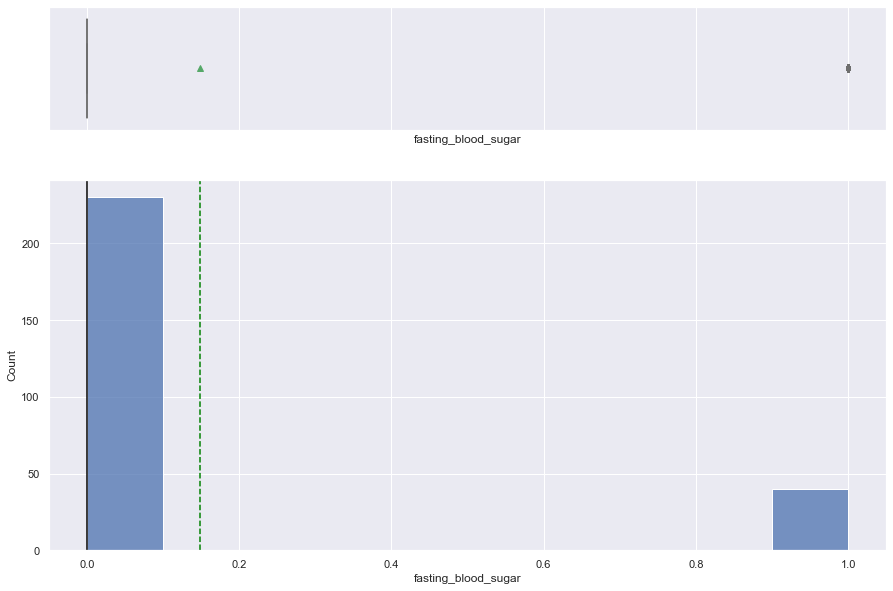

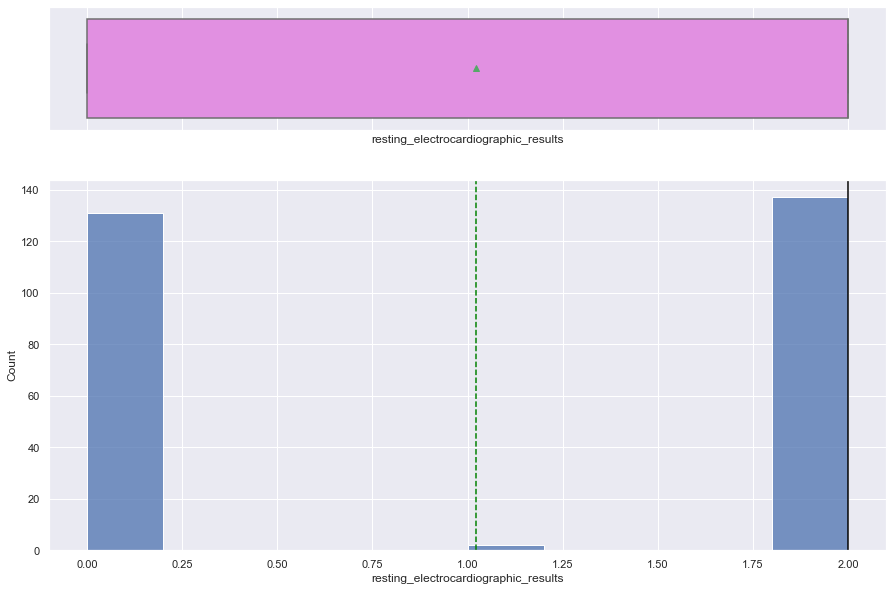

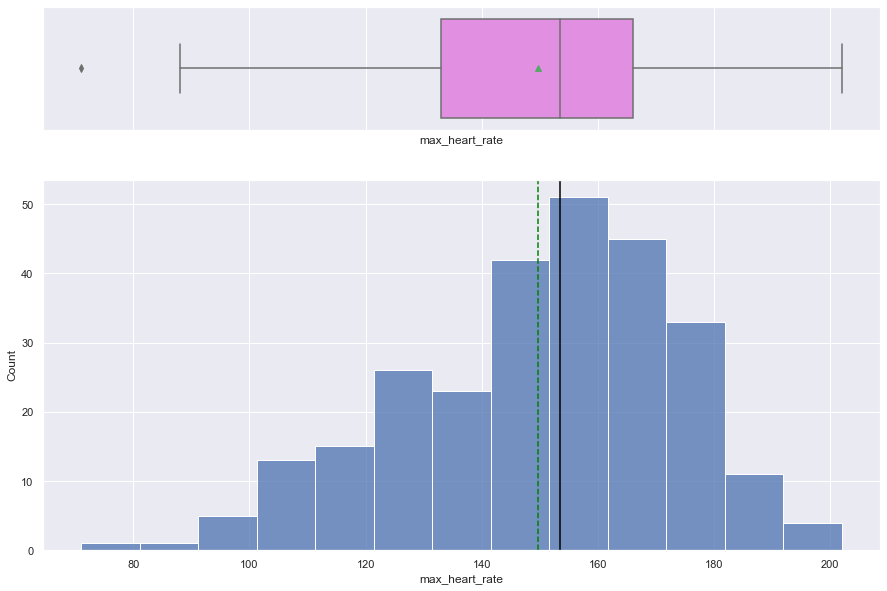

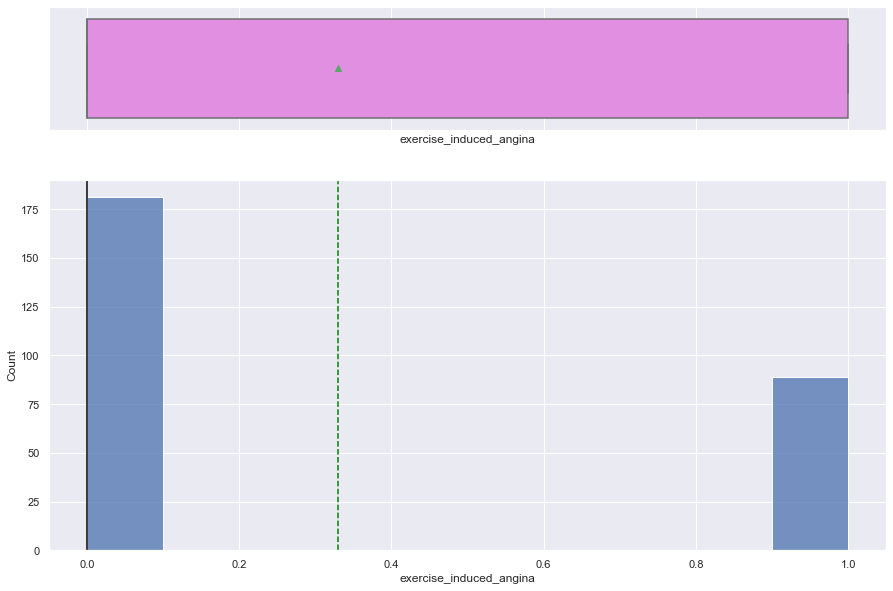

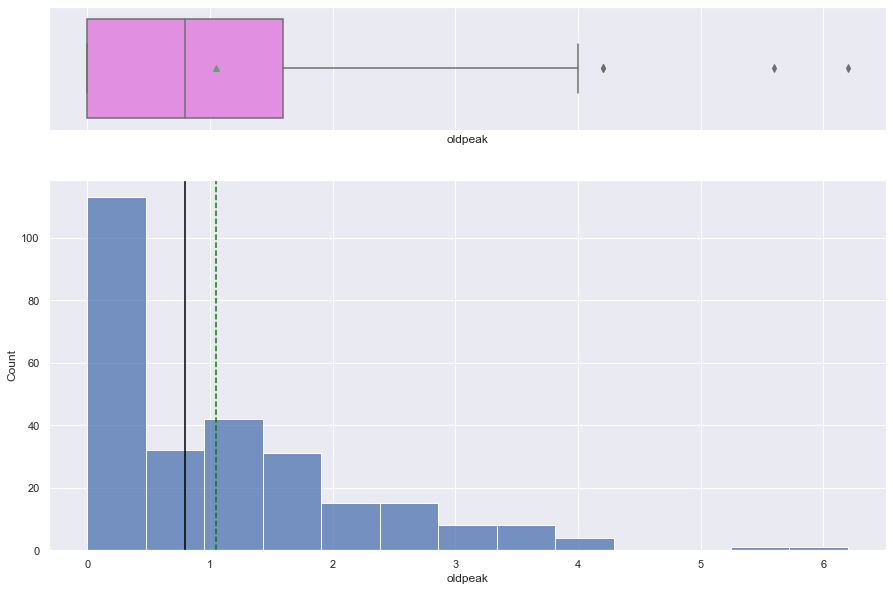

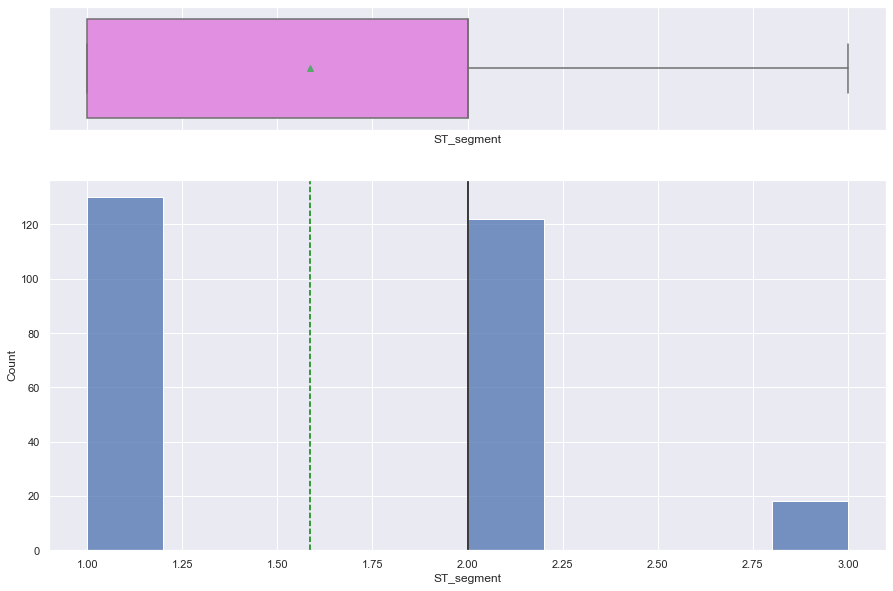

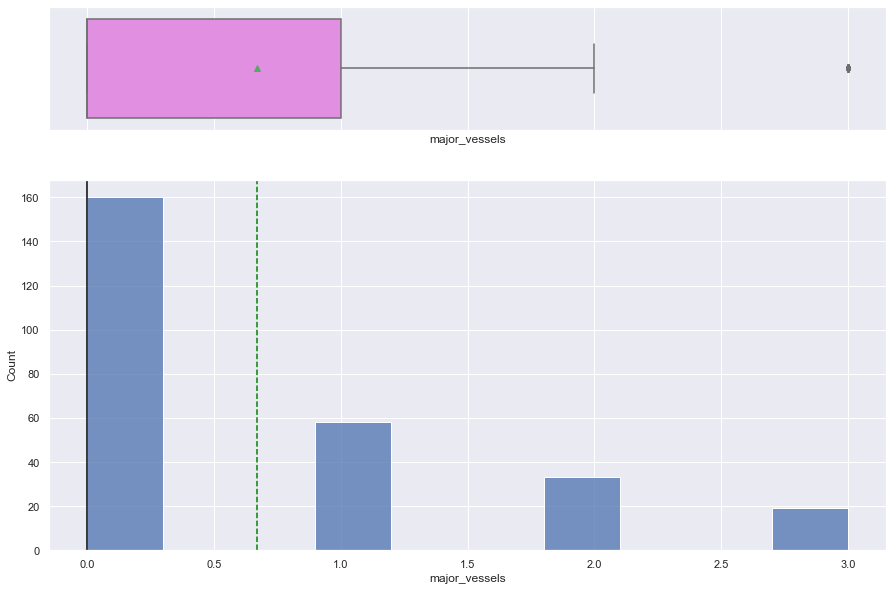

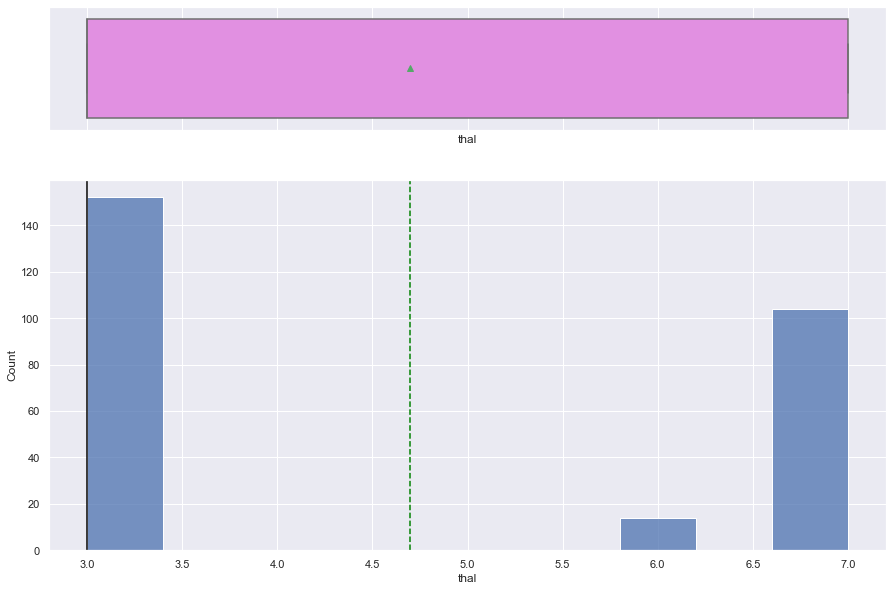

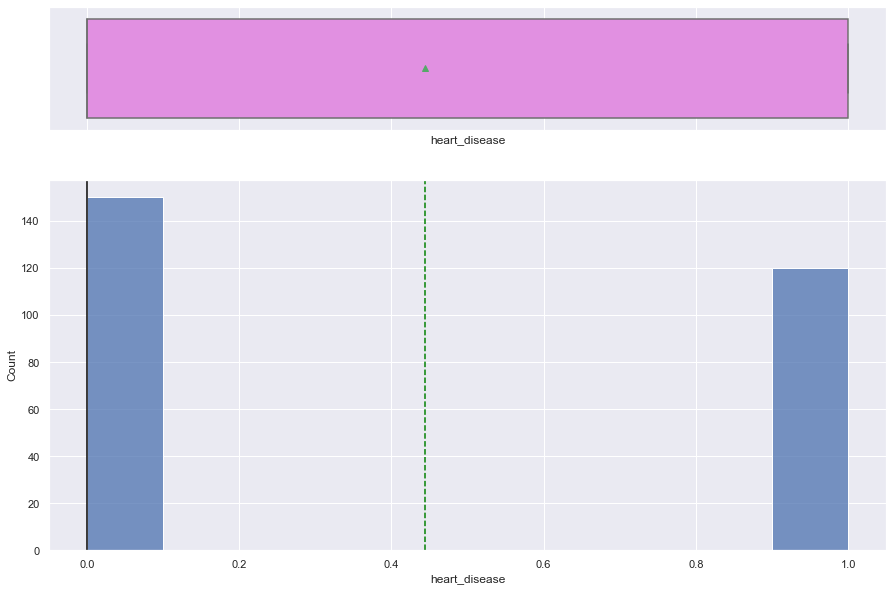

In [9]:
num_col=data.select_dtypes(include=np.number).columns.tolist()
for i in num_col:
    histogram_boxplot(data, i);

### Bivariate Analysis

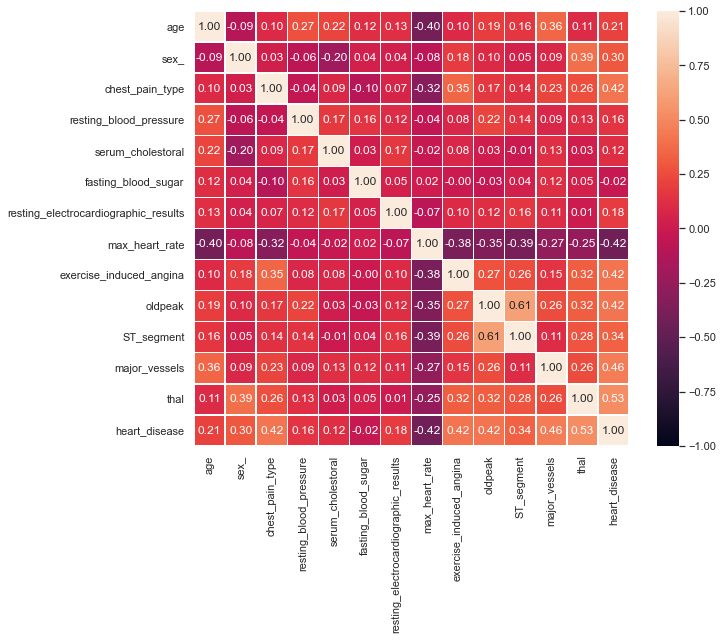

In [10]:
plt.figure(figsize=(10, 8));
sns.heatmap(data=data.corr(), annot=True, cbar=True, fmt=".2f", linewidth=.5,vmin=-1, square=True);

#### Observations
* No pair of variables has an absolute correlation value greater than 0.68. 
* Furthur bivariate analysis is therefore not necessary. However some graphs will be included that explore pairwise distribution

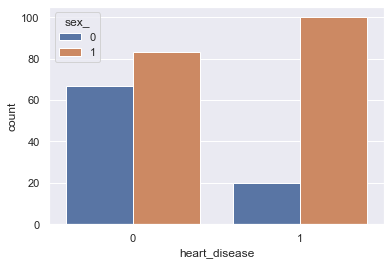

In [11]:
sns.countplot(data=data, x="heart_disease", hue="sex_");

### Multivariate Analysis

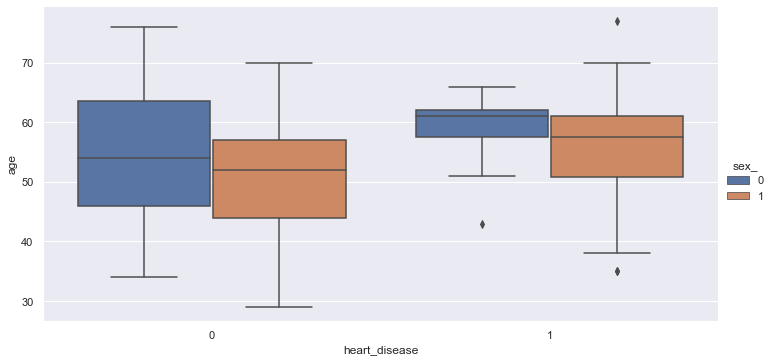

In [12]:
sns.catplot(data=data, x="heart_disease", y="age", hue="sex_", kind="box", aspect=2);

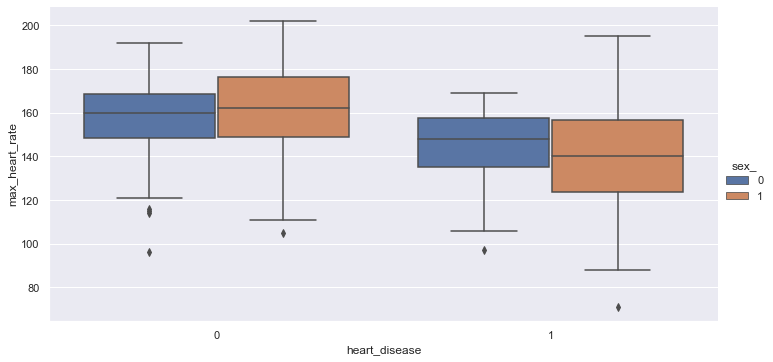

In [13]:
sns.catplot(data=data, x="heart_disease", y="max_heart_rate", hue="sex_", kind="box", aspect=2);

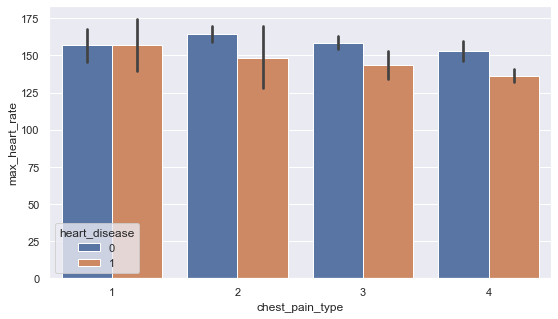

In [14]:
plt.figure(figsize=(9,5));
sns.barplot(data=data, x="chest_pain_type", y="max_heart_rate", hue="heart_disease");

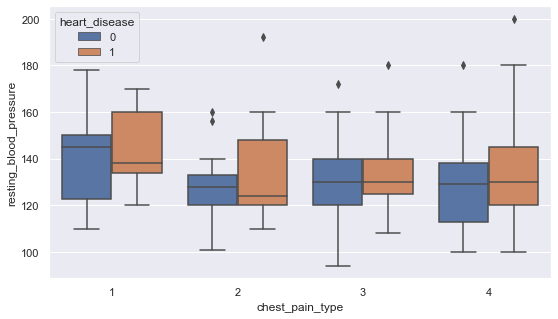

In [15]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="chest_pain_type", y="resting_blood_pressure", hue="heart_disease");

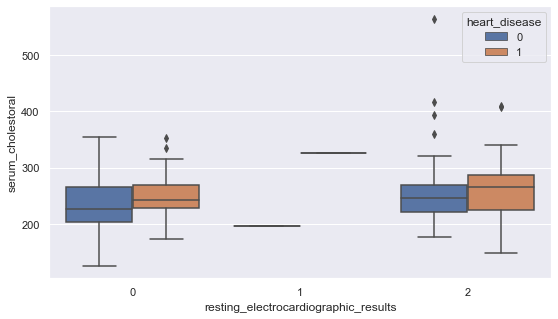

In [16]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="resting_electrocardiographic_results", y="serum_cholestoral", hue="heart_disease");

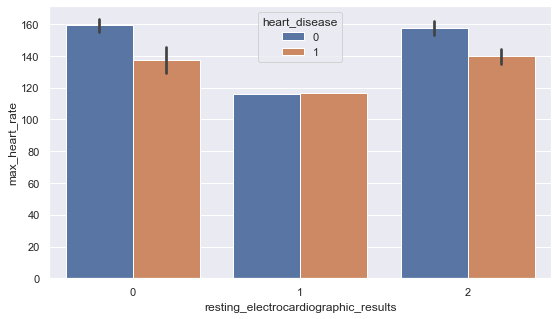

In [17]:
plt.figure(figsize=(9,5));
sns.barplot(data=data, x="resting_electrocardiographic_results", y="max_heart_rate", hue="heart_disease");

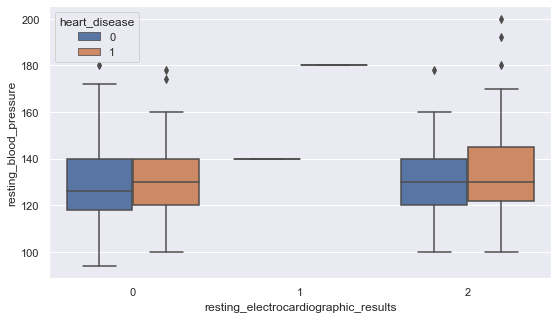

In [18]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="resting_electrocardiographic_results", y="resting_blood_pressure", hue="heart_disease");

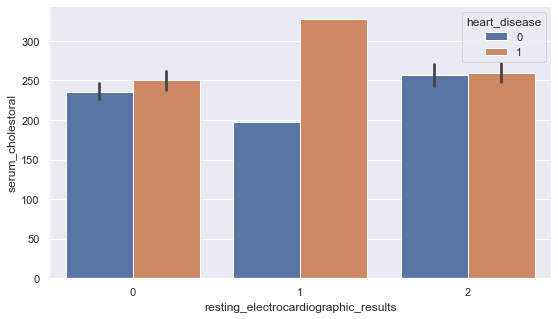

In [19]:
plt.figure(figsize=(9,5));
sns.barplot(data=data, x="resting_electrocardiographic_results", y="serum_cholestoral", hue="heart_disease");

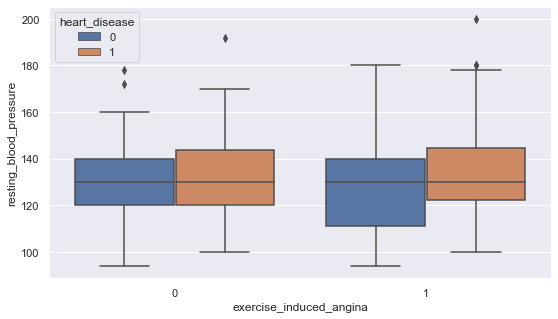

In [20]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="exercise_induced_angina", y="resting_blood_pressure", hue="heart_disease");

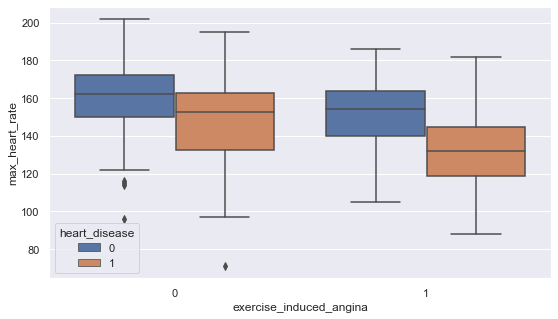

In [21]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="exercise_induced_angina", y="max_heart_rate", hue="heart_disease");

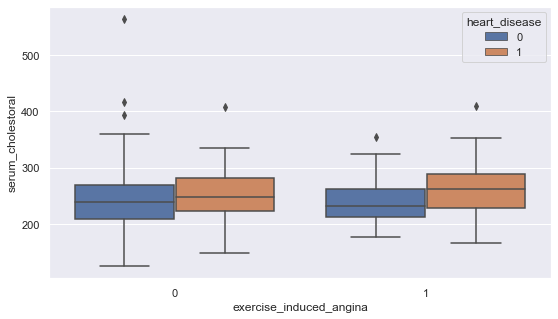

In [22]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="exercise_induced_angina", y="serum_cholestoral", hue="heart_disease");

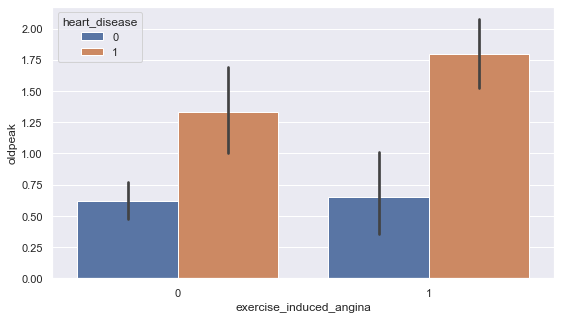

In [23]:
plt.figure(figsize=(9,5));
sns.barplot(data=data, x="exercise_induced_angina", y="oldpeak", hue="heart_disease");

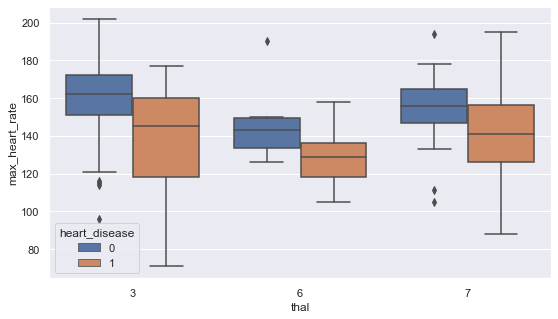

In [24]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="thal", y="max_heart_rate", hue="heart_disease");

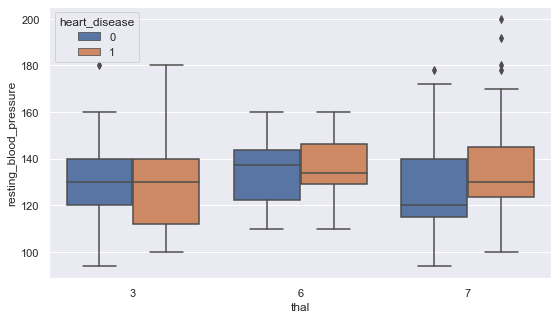

In [25]:
plt.figure(figsize=(9,5));
sns.boxplot(data=data, x="thal", y="resting_blood_pressure", hue="heart_disease");

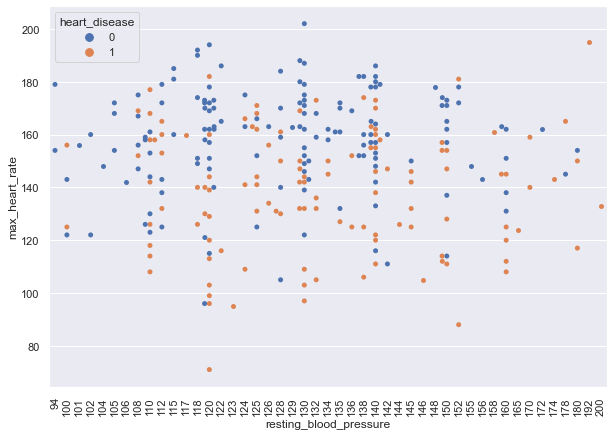

In [26]:
plt.figure(figsize=(10,7));
sns.swarmplot(data=data, x="resting_blood_pressure", y="max_heart_rate", hue="heart_disease");
plt.xticks(rotation=90);

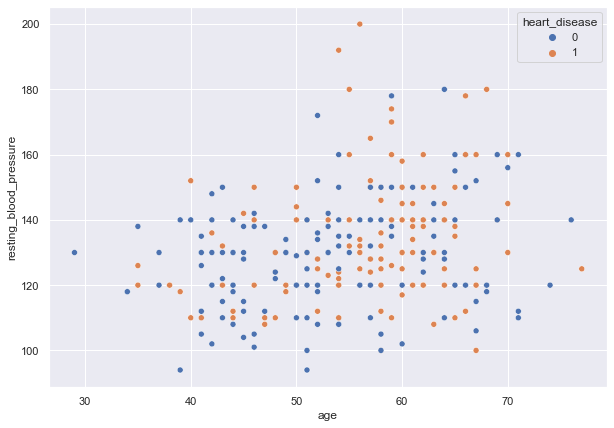

In [27]:
plt.figure(figsize=(10,7));
sns.scatterplot(data=data, y="resting_blood_pressure", x="age", hue="heart_disease", palette="deep");


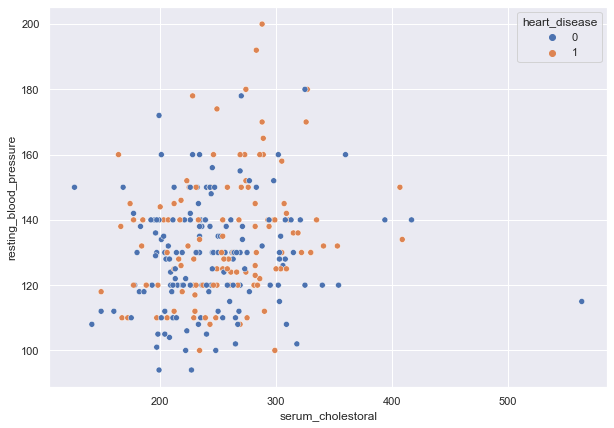

In [28]:
plt.figure(figsize=(10,7));
sns.scatterplot(data=data, y="resting_blood_pressure", x="serum_cholestoral", hue="heart_disease", palette="deep");


### Data processing

In [29]:
data.isnull().sum()

age                                     0
sex_                                    0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
max_heart_rate                          0
exercise_induced_angina                 0
oldpeak                                 0
ST_segment                              0
major_vessels                           0
thal                                    0
heart_disease                           0
dtype: int64

In [30]:
#Converting the object types into categories
cols = ['sex_', 'chest_pain_type', "fasting_blood_sugar","resting_electrocardiographic_results","exercise_induced_angina", "ST_segment","major_vessels","thal" ]
for i in cols:
    data[i] = data[i].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex_                                  270 non-null    category
 2   chest_pain_type                       270 non-null    category
 3   resting_blood_pressure                270 non-null    int64   
 4   serum_cholestoral                     270 non-null    int64   
 5   fasting_blood_sugar                   270 non-null    category
 6   resting_electrocardiographic_results  270 non-null    category
 7   max_heart_rate                        270 non-null    int64   
 8   exercise_induced_angina               270 non-null    category
 9   oldpeak                               270 non-null    float64 
 10  ST_segment                            270 non-null    category
 11  major_

## EDA

### Multivariate Analysis

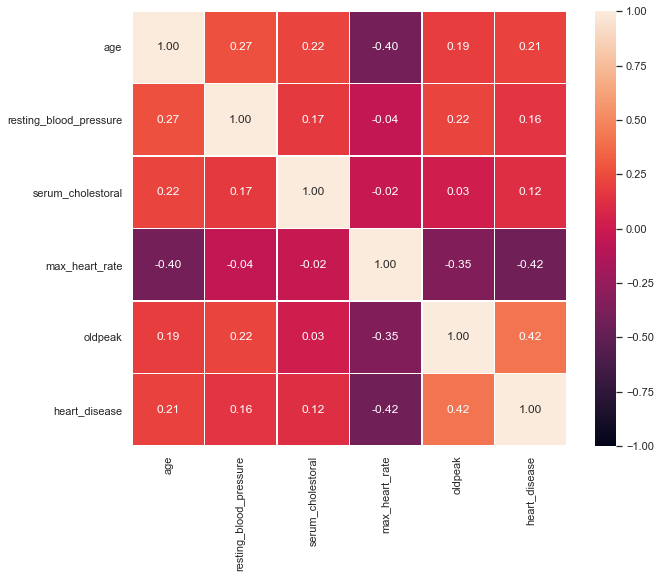

In [31]:
plt.figure(figsize=(10, 8));
sns.heatmap(data=data.corr(), annot=True, cbar=True, fmt=".2f", linewidth=.5,vmin=-1, square=True);

### Multivariate Analysis

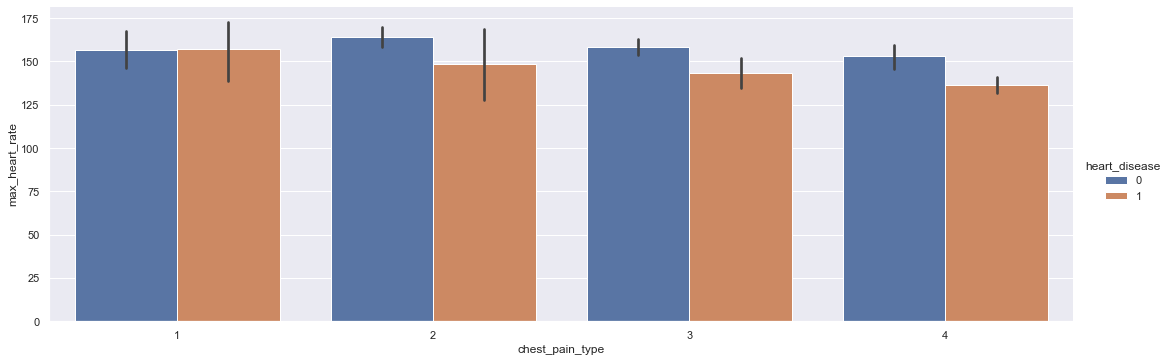

In [32]:
sns.catplot(data=data, x="chest_pain_type", y="max_heart_rate", hue="heart_disease", kind="bar", aspect=3);

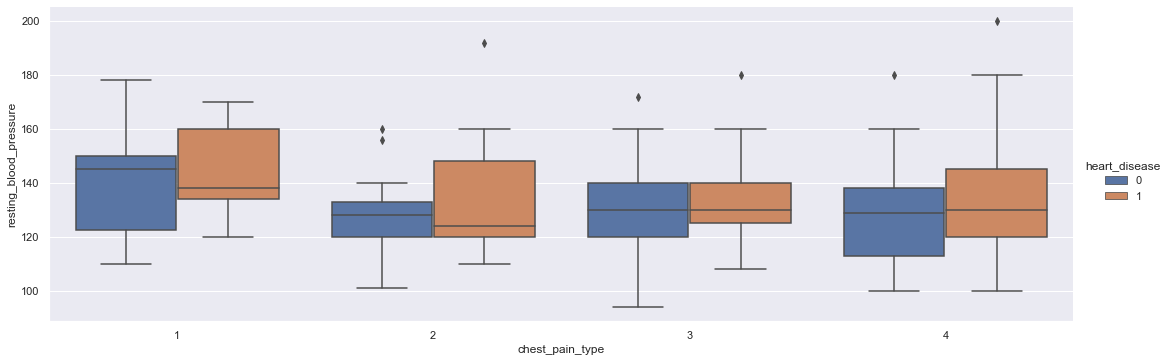

In [33]:
sns.catplot(data=data, x="chest_pain_type", y="resting_blood_pressure", hue="heart_disease", kind="box", aspect=3);

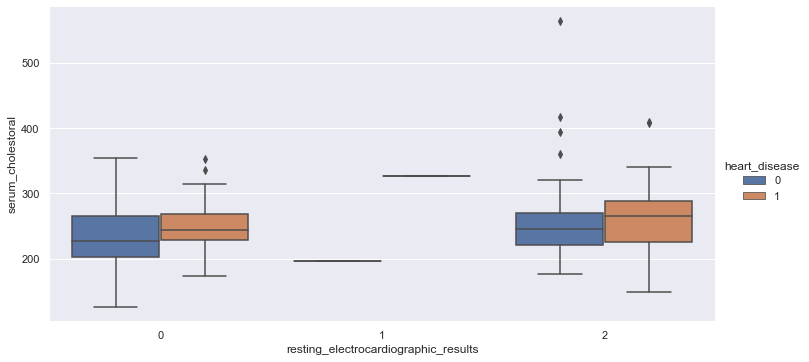

In [34]:
sns.catplot(data=data, x="resting_electrocardiographic_results", y="serum_cholestoral", hue="heart_disease", kind="box", aspect=2);

In [35]:
data.resting_electrocardiographic_results.value_counts()

2    137
0    131
1      2
Name: resting_electrocardiographic_results, dtype: int64

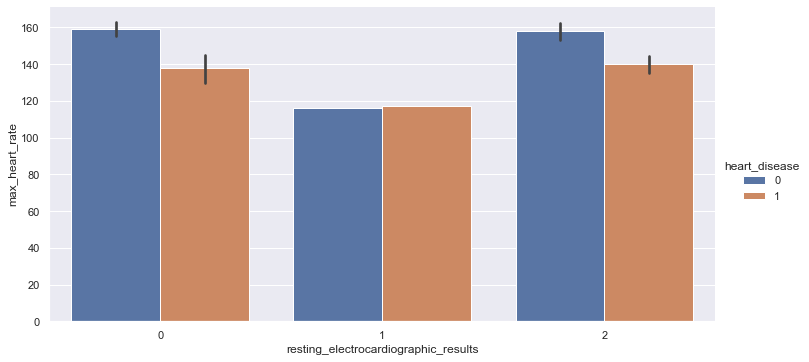

In [36]:
sns.catplot(data=data, x="resting_electrocardiographic_results", y="max_heart_rate", hue="heart_disease", kind="bar", aspect=2);

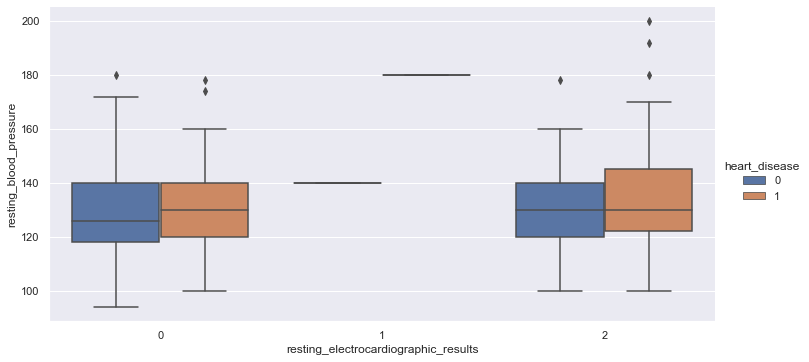

In [37]:
sns.catplot(data=data, x="resting_electrocardiographic_results", y="resting_blood_pressure", hue="heart_disease", kind="box", aspect=2);

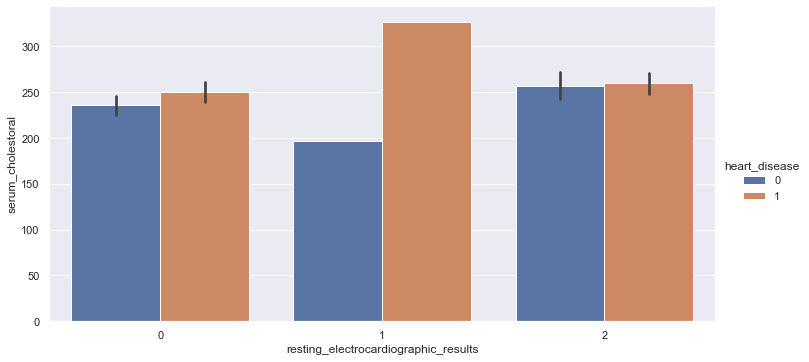

In [38]:
sns.catplot(data=data, x="resting_electrocardiographic_results", y="serum_cholestoral", hue="heart_disease", kind="bar", aspect=2);

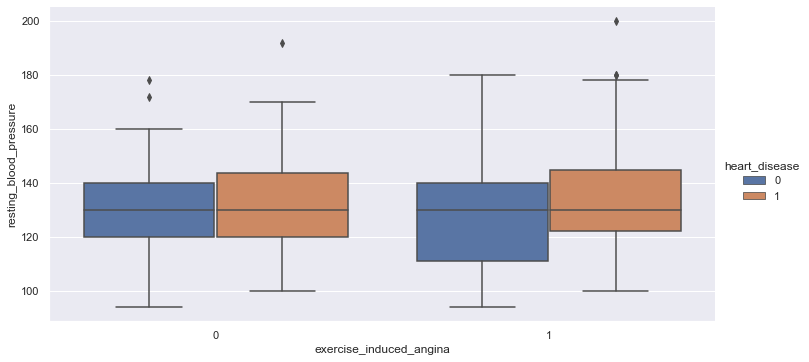

In [39]:
sns.catplot(data=data, x="exercise_induced_angina", y="resting_blood_pressure", hue="heart_disease", kind="box", aspect=2);

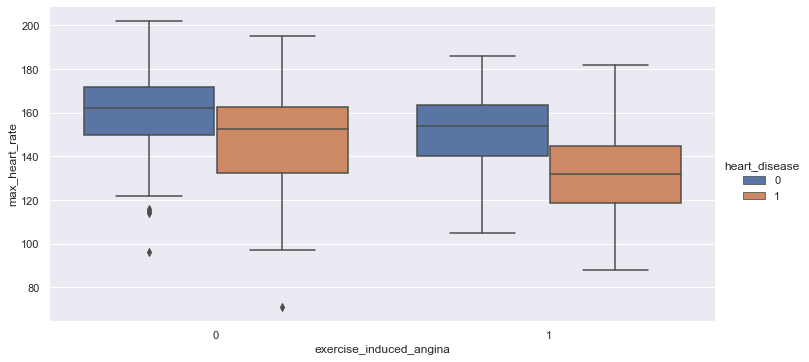

In [40]:
sns.catplot(data=data, x="exercise_induced_angina", y="max_heart_rate", hue="heart_disease", kind="box", aspect=2);

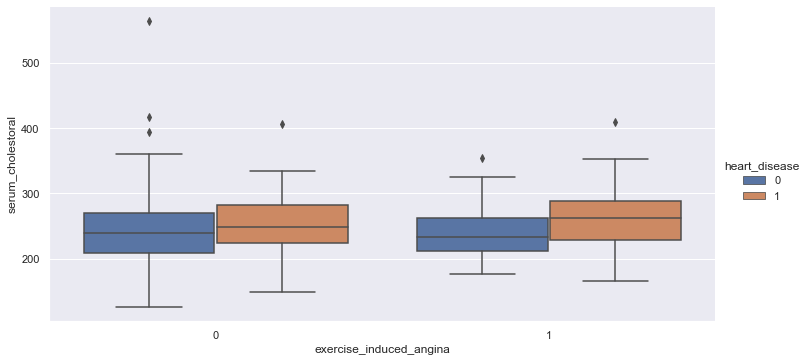

In [41]:
sns.catplot(data=data, x="exercise_induced_angina", y="serum_cholestoral", hue="heart_disease", kind="box", aspect=2);

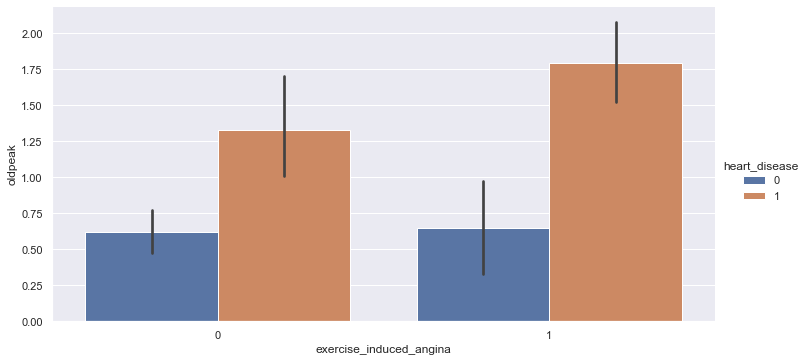

In [42]:
sns.catplot(data=data, x="exercise_induced_angina", y="oldpeak", hue="heart_disease", kind="bar", aspect=2);

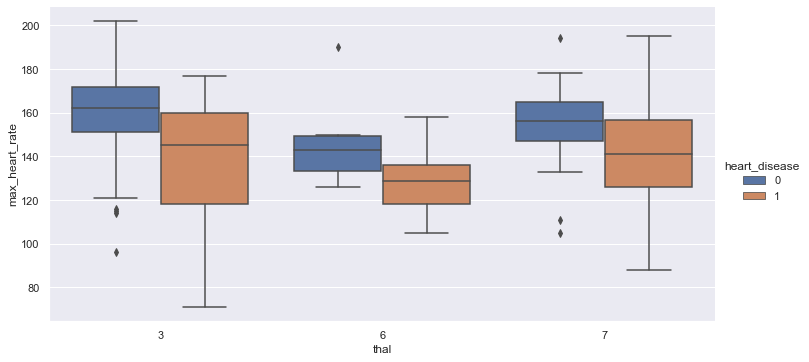

In [43]:
sns.catplot(data=data, x="thal", y="max_heart_rate", hue="heart_disease", kind="box", aspect=2);

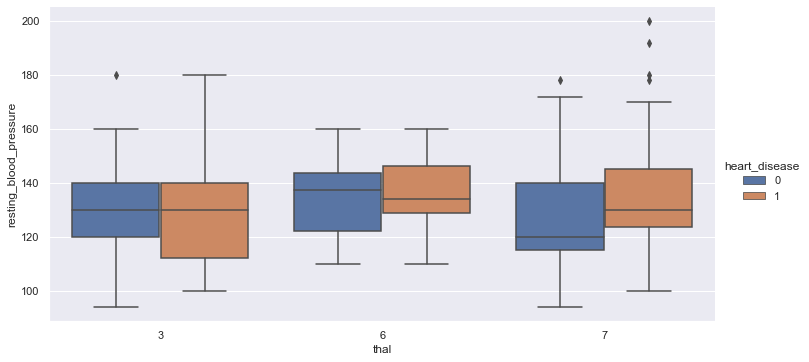

In [44]:
sns.catplot(data=data, x="thal", y="resting_blood_pressure", hue="heart_disease", kind="box", aspect=2);

### Model Building

In [45]:
# splitting the data into the dependent and independent variables
X = data.drop("heart_disease", axis=1)
y = data["heart_disease"]

In [46]:
# creating dummy variables for the independent variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,age,resting_blood_pressure,serum_cholestoral,max_heart_rate,oldpeak,sex__1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,fasting_blood_sugar_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,exercise_induced_angina_1,ST_segment_2,ST_segment_3,major_vessels_1,major_vessels_2,major_vessels_3,thal_6,thal_7
0,70,130,322,109,2.400,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,67,115,564,160,1.600,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,57,124,261,141,0.300,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,64,128,263,105,0.200,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1
4,74,120,269,121,0.200,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0


In [47]:
# Splitting data into training, validation and test sets in the ratio 60:20:20
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)


In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (162, 20)
Shape of Validation set :  (54, 20)
Shape of test set :  (54, 20)
Percentage of classes in training set:
0   0.556
1   0.444
Name: heart_disease, dtype: float64
Percentage of classes in validation set:
0   0.556
1   0.444
Name: heart_disease, dtype: float64
Percentage of classes in test set:
0   0.556
1   0.444
Name: heart_disease, dtype: float64


- By running strartify =y in the code, the distribution of heart disease was maintained in all 3 data sets

In [49]:
#Training the model using the ordinary least squares (OLS) method
base_olsmodel = sm.OLS(y_train, X_train).fit()
print(base_olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:          heart_disease   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              21.46
Date:                Sat, 01 Jul 2023   Prob (F-statistic):                    2.24e-33
Time:                        11:34:05   Log-Likelihood:                         -51.445
No. Observations:                 162   AIC:                                      142.9
Df Residuals:                     142   BIC:                                      204.6
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### Observations
* The base model can account for approximately 76% of the variation in the data. 

### Check for multicolilinearity

We will test for multicollinearity using Variance Inflation Factor(VIF).

General Rule of thumb:

* If VIF is 1 then there is no correlation between the k
th predictor and the remaining predictor variables.
* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity

In [50]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [51]:
#Calculating the VIF of each column
checking_vif(X_train)

,feature,VIF
0,age,41.800
1,resting_blood_pressure,65.929
2,serum_cholestoral,36.331
3,max_heart_rate,44.397
4,oldpeak,3.745
5,sex__1,4.433
6,chest_pain_type_2,2.861
7,chest_pain_type_3,4.295
8,chest_pain_type_4,6.120
9,fasting_blood_sugar_1,1.409


In [52]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [53]:
col_list=["resting_electrocardiographic_results_1", "chest_pain_type_4"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,resting_electrocardiographic_results_1,0.717,0.355
1,chest_pain_type_4,0.694,0.369


In [54]:
# Dropping corporate market segment and comparing VIF
col_to_drop = "resting_electrocardiographic_results_1"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  resting_electrocardiographic_results_1


,feature,VIF
0,age,41.573
1,resting_blood_pressure,64.096
2,serum_cholestoral,36.270
3,max_heart_rate,42.851
4,oldpeak,3.727
5,sex__1,4.418
6,chest_pain_type_2,2.857
7,chest_pain_type_3,4.279
8,chest_pain_type_4,6.088
9,fasting_blood_sugar_1,1.408


In [55]:
col_to_drop = "chest_pain_type_4"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  chest_pain_type_4


,feature,VIF
0,age,41.132
1,resting_blood_pressure,63.658
2,serum_cholestoral,35.127
3,max_heart_rate,40.514
4,oldpeak,3.714
5,sex__1,4.407
6,chest_pain_type_2,1.707
7,chest_pain_type_3,2.053
8,fasting_blood_sugar_1,1.392
9,resting_electrocardiographic_results_2,2.467


In [56]:
# Building a model after dropping the columns with the highest multicollinearity 
olsmodel = sm.OLS(y_train, X_train3).fit()
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:          heart_disease   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              21.37
Date:                Sat, 01 Jul 2023   Prob (F-statistic):                    5.14e-32
Time:                        11:34:08   Log-Likelihood:                         -58.846
No. Observations:                 162   AIC:                                      153.7
Df Residuals:                     144   BIC:                                      209.3
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

### Dropping High P values

#### Dropping the columns whose p-value is >0.05(5%) as they do not significantly impact the target variable.

In [57]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['serum_cholestoral', 'max_heart_rate', 'oldpeak', 'sex__1', 'resting_electrocardiographic_results_2', 'major_vessels_1', 'major_vessels_2', 'thal_7']


In [58]:
X_train4= X_train3[selected_features]
X_test4= X_test3[selected_features]
olsmodel2 = sm.OLS(y_train, X_train4).fit()
print(olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:          heart_disease   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              45.42
Date:                Sat, 01 Jul 2023   Prob (F-statistic):                    8.70e-37
Time:                        11:34:10   Log-Likelihood:                         -66.031
No. Observations:                 162   AIC:                                      148.1
Df Residuals:                     154   BIC:                                      172.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [59]:
#Ensuring the validation sub-set has the same features as the training 
X_val2= X_val[selected_features]
X_val2= X_val[selected_features]
print("Shape of Training set : ", X_train4.shape)
print("Shape of Validation set : ", X_val2.shape)

Shape of Training set :  (162, 8)
Shape of Validation set :  (54, 8)


#### Observations
* Same number of columns

## Model Perfomance Evaluation

In [60]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf
# checking model performance on train set 
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel2, X_train4, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.364,0.294,0.464,0.436,inf


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel2, X_test4, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.374,0.278,0.434,0.333,inf


### Checking Linear Regression Assumptions

In [62]:
# Dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train 
df_pred["Fitted Values"] = olsmodel2.fittedvalues 
df_pred["Residuals"] = olsmodel2.resid 
df_pred.sample(10)

,Actual Values,Fitted Values,Residuals
200,0,0.800,-0.800
51,0,-0.029,0.029
53,0,0.044,-0.044
104,1,0.931,0.069
156,1,0.962,0.038
62,0,0.055,-0.055
221,1,1.092,-0.092
218,0,0.689,-0.689
50,1,0.472,0.528
266,0,0.455,-0.455


### Test for Linearity and Independence

- Carried out by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, the model is linear and residuals are independent.Otherwise, the model is showing signs of non-linearity and residuals are not independent

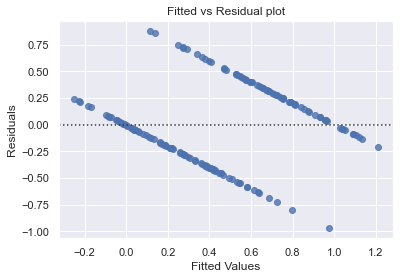

In [63]:
#Checking for patterns in residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation
* There is a clear pattern between the fitted values and residuals.
* The model is therefore not linear

### Test for noramlity

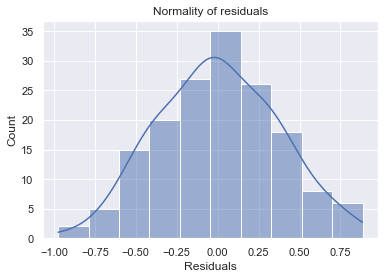

In [64]:
#Distribution of the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

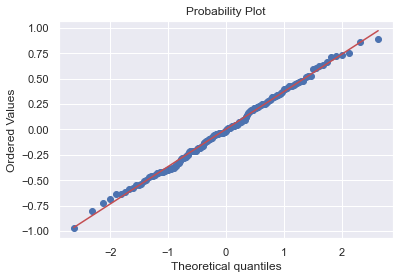

In [65]:
#Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

### Shapiro test
For this hypothesis test, the null hypothesis is:
> $H_0$ The residuals are normally distributed
> 
Alternate Hypothesis
> $H_a$ The residuals are not normally distributed

In [66]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9953057169914246, pvalue=0.8899123072624207)

#### Observations
* The probability is greater than 0.05 therefore we fail to reject the null hypothesis.
* The residuals are normally distributed

### Homoscedastic
Null hyptothesis:
> $H_0$The residuals are homoscedastic
> 
Alternate Hypothesis
> $H_a$ The residuals are not homoscedastic(heteroscedastic)

In [67]:
#Importing the relevant libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.7897503381645355), ('p-value', 0.8422505584159977)]

#### Observations
* The probability is greater than 0.05 therefore we fail to reject the null hypothesis.
* The residuals are homoscedastic

### ROC-AUC Model perfomance Improvement


### Perfomance Metrics

4 possible outcomes from the model:
    1. True Postive(TP) - Model accurately predicts patients with heart disease
    2. True Negative(TN) - Model accurately predicts patients without heart disease
    3. Fale Positive(FP) - Model inaccurately predicts patients with heart disease when they do not.
    4. False Negative(FN) - Model inaccurately predicts patients without heart disease when they do have it.
    
From the last 2 scenarios, the most expensive mistake the model can make is false negatives. This scenario can lead to a patient's death which can be avoided. </br>
The perfomance scoring metric used will be the **Recall/True Positive Rate(TPR)**.</br>
This is a measure of the fraction of the total postive classifications did the model get right. Defined by</br>
           $$
           Recall= \frac{TP}{TP+FN}
           $$

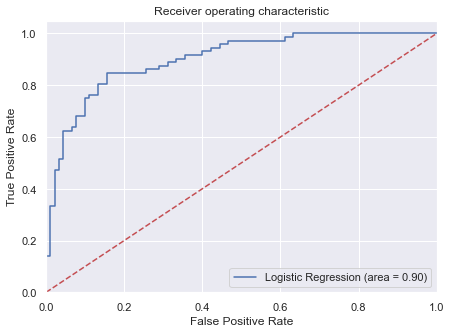

In [68]:
logit_roc_auc_train = roc_auc_score(y_train, olsmodel2.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, olsmodel2.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement
 Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [69]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where True Positive Rate(tpr) is high and False Positive Rate(fpr) is low
fpr, tpr, thresholds = roc_curve(y_train, olsmodel2.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold ofrom the curve is ", optimal_threshold_auc_roc)

The optimal threshold ofrom the curve is  0.47097021916030246


In [70]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 2
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [71]:
# checking model performance on the training set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    olsmodel2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.840,0.833,0.811,0.822


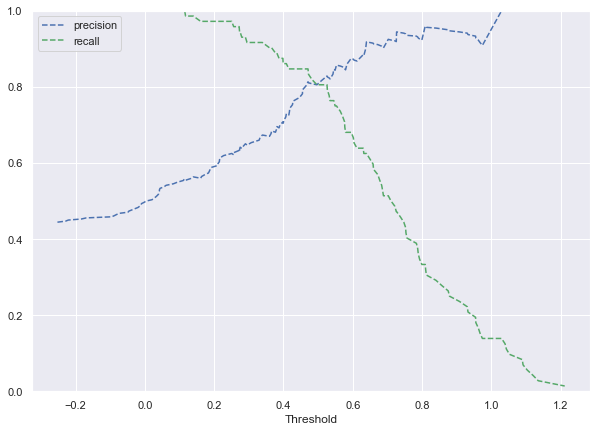

In [72]:
y_scores = olsmodel2.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [73]:
# setting the threshold fromt the graph
optimal_threshold_curve = 0.45

In [74]:
# checking model performance on training data
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    olsmodel2, X_train4, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.827,0.847,0.782,0.813


In [75]:
# checking model performance on testing data
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    olsmodel2, X_test4, y_test, threshold=optimal_threshold_curve
)
print("testing performance:")
log_reg_model_test_perf_threshold_auc_roc

testing performance:


,Accuracy,Recall,Precision,F1
0,0.852,0.833,0.833,0.833


#### Observations
* The ideal thereshold(0.45) produces a corresponding model with a recall value of 84.7%
* This is a 1.4% improvement

## Other model classifiers

In [76]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
  

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
          },
        index=[0],
    )

    return df_perf

In [77]:
scorer = metrics.make_scorer(metrics.recall_score)

In [78]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.7619047619047619
Bagging: 0.6104761904761904
Random forest: 0.6238095238095237
GBM: 0.6676190476190477
Adaboost: 0.6238095238095237
Xgboost: 0.6247619047619047
dtree: 0.7085714285714284

Validation Performance:

Logistic regression: 0.8333333333333334
Bagging: 0.6666666666666666
Random forest: 0.75
GBM: 0.75
Adaboost: 0.6666666666666666
Xgboost: 0.7083333333333334
dtree: 0.6666666666666666


In [79]:
# defining model
original_lm_model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=original_lm_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.7000000000000001} with CV score=0.7495238095238095:


In [80]:
# building model with best parameters
lm_tuned_train =LogisticRegression(random_state=1,
  C=0.7
)

# Fit the model on training data
lm_tuned_train.fit(X_train, y_train)

LogisticRegression(C=0.7, random_state=1)

In [81]:
# Calculating different metrics on train set
lm_ideal_train = model_performance_classification_statsmodels(
    lm_tuned_train, X_train, y_train
)
print("Training pelmormance:")
lm_ideal_train

Training pelmormance:


,Accuracy,Recall,Precision,F1
0,0.840,0.792,0.838,0.814


In [82]:
# Calculating different metrics on test set
# building model with best parameters
lm_tuned_test =LogisticRegression(random_state=1,
  C=0.7
)

# Fit the model on testing data
lm_tuned_test.fit(X_test, y_test)
lm_ideal_test = model_performance_classification_statsmodels(
    lm_tuned_test, X_test, y_test
)
print("testing pelmormance:")
lm_ideal_test

testing pelmormance:


,Accuracy,Recall,Precision,F1
0,0.907,0.875,0.913,0.894


### Model Building with Oversampled data

In [83]:
# Synthetic Minority Over Sampling Technique

smt = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = smt.fit_resample(X_train, y_train)

In [84]:
print("The non-target variable has", X_train_over.shape[0], "rows and ", X_train_over.shape[1], "columns")
print("The target variable now has", y_train_over.shape[0], "rows and 1 column")

The non-target variable has 180 rows and  20 columns
The target variable now has 180 rows and 1 column


In [85]:
over_models = []  # Empty list to store all the over_models

# Appending over_models into the list
over_models.append(("Logistic regression", LogisticRegression(random_state=1)))
over_models.append(("dtree", DecisionTreeClassifier(random_state=1)))
over_models.append(("Bagging", BaggingClassifier(random_state=1)))
over_models.append(("Random forest", RandomForestClassifier(random_state=1)))
over_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
over_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
over_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
over_models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the over_models


# loop through all over_models to get the mean cross validated score
print("\n" "Cross-Validation performance on over sampled training dataset:" "\n")

for name, model in over_models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in over_models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on over sampled training dataset:

Logistic regression: 0.7777777777777778
dtree: 0.7555555555555555
Bagging: 0.6555555555555557
Random forest: 0.788888888888889
GBM: 0.7444444444444445
Adaboost: 0.7333333333333333
Xgboost: 0.7777777777777778
dtree: 0.7555555555555555

Validation Performance:

Logistic regression: 0.7916666666666666
dtree: 0.625
Bagging: 0.7083333333333334
Random forest: 0.75
GBM: 0.75
Adaboost: 0.7916666666666666
Xgboost: 0.75
dtree: 0.625


In [86]:
# defining model
over_lm_model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1) }
#Calling RandomizedSearchCV
over_lm_randomized_cv = RandomizedSearchCV(estimator=over_lm_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
over_lm_randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(over_lm_randomized_cv.best_params_,over_lm_randomized_cv.best_score_))

Best parameters are {'C': 0.4} with CV score=0.7666666666666666:


In [87]:
# building model with best parameters
lm_tuned_over = LogisticRegression(random_state=1,
  C=0.4
)

# Fit the model on overing data
lm_tuned_over.fit(X_train_over, y_train_over)

LogisticRegression(C=0.4, random_state=1)

In [88]:
# Calculating different metrics on over set
lm_ideal_over = model_performance_classification_sklearn(
    lm_tuned_over, X_train_over, y_train_over
)
print("Oversampled data performance:")
lm_ideal_over

Oversampled data performance:


,Accuracy,Recall,Precision,F1
0,0.817,0.811,0.820,0.816


In [89]:
#Testing pelmomance on test data
lm_tuned_test =LogisticRegression(random_state=1,
  C=0.4
)

# Fit the model on training data
lm_tuned_test.fit(X_test, y_test)

lm_ideal_over_test = model_performance_classification_statsmodels(
   lm_tuned_test, X_test, y_test
)
print("testidation pelmormance:")
lm_ideal_over_test

testidation pelmormance:


,Accuracy,Recall,Precision,F1
0,0.870,0.792,0.905,0.844


#### Observations
* There is a decrease in recall value after tuning. 
* This indicates that the model was overtrained.

### Model Building with Undersampled data

In [90]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [91]:
print("The non-target variable has", X_train_un.shape[0], "rows and ", X_train_un.shape[1], "columns")
print("The target variable now has", y_train_un.shape[0], "rows and 1 column")

The non-target variable has 144 rows and  20 columns
The target variable now has 144 rows and 1 column


In [92]:
under_models = []  # Empty list to store all the under_models

# Appending under_models into the list
under_models.append(("Logistic regression", LogisticRegression(random_state=1)))
under_models.append(("dtree", DecisionTreeClassifier(random_state=1)))
under_models.append(("Bagging", BaggingClassifier(random_state=1)))
under_models.append(("Random forest", RandomForestClassifier(random_state=1)))
under_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
under_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
under_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
under_models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the under_models


# loop through all under_models to get the mean cross validated score
print("\n" "Cross-Validation performance on under sampled training dataset:" "\n")

for name, model in under_models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in under_models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on under sampled training dataset:

Logistic regression: 0.7228571428571429
dtree: 0.7238095238095238
Bagging: 0.7085714285714286
Random forest: 0.6952380952380952
GBM: 0.738095238095238
Adaboost: 0.7238095238095238
Xgboost: 0.6961904761904761
dtree: 0.7238095238095238

Validation Performance:

Logistic regression: 0.8333333333333334
dtree: 0.75
Bagging: 0.625
Random forest: 0.75
GBM: 0.7916666666666666
Adaboost: 0.7916666666666666
Xgboost: 0.7916666666666666
dtree: 0.75


#### Observations
- The best perfoming classifier is the Logistic regression model with a recall score on the validation data set at ~83% 

In [93]:
# defining model
under_lm_model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=under_lm_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.4} with CV score=0.780952380952381:


In [94]:
# building model with best parameters
lm_tuned_un =LogisticRegression(random_state=1,C=0.4
)

# Fit the model on training data
lm_tuned_un.fit(X_train_un, y_train_un)

LogisticRegression(C=0.4, random_state=1)

In [95]:
# Calculating different metrics on train set
lm_ideal_un = model_performance_classification_statsmodels(
    lm_tuned_un, X_train_un, y_train_un
)
print("Undersampled data pelmormance:")
lm_ideal_un

Undersampled data pelmormance:


,Accuracy,Recall,Precision,F1
0,0.833,0.819,0.843,0.831


In [96]:
#Testing pelmomance on testidation 
lm_tuned_un_test =LogisticRegression(random_state=1,
  C=0.4
)

# Fit the model on training data
lm_tuned_un_test.fit(X_test, y_test)
lm_ideal_un_test = model_performance_classification_statsmodels(
   lm_tuned_un_test, X_test, y_test
)
print("testing perfomance:")
lm_ideal_un_test

testing perfomance:


,Accuracy,Recall,Precision,F1
0,0.870,0.792,0.905,0.844


#### Observations
* There is a decrease in recall value after tuning. 
* This indicates that the model was overtrained.

### Model comparison

In [97]:
# training pelmormance comparison

models_train_comp_df = pd.concat(
    [
        lm_ideal_train.T,
        lm_ideal_over.T, 
        lm_ideal_un.T,
        log_reg_model_train_perf_threshold_auc_roc.T,   
      
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Logistic Regression(Original Data)",
    "Tuned Logistic Regression(Oversampled Data)",
    "Tuned Logistic Regression(Undersampled Data)",
    "ROC_AUC Tuned Linear Regression Model",
   
 
]
print("Training perfomance comparison:")
models_train_comp_df.T

Training perfomance comparison:


,Accuracy,Recall,Precision,F1
Tuned Logistic Regression(Original Data),0.840,0.792,0.838,0.814
Tuned Logistic Regression(Oversampled Data),0.817,0.811,0.820,0.816
Tuned Logistic Regression(Undersampled Data),0.833,0.819,0.843,0.831
ROC_AUC Tuned Linear Regression Model,0.827,0.847,0.782,0.813


In [98]:
# testing pelmormance comparison

models_test_comp_df = pd.concat(
    [
        lm_ideal_test.T,
        lm_ideal_over_test.T, 
        lm_ideal_un_test.T,
        log_reg_model_test_perf_threshold_auc_roc.T,   
      
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Tuned Logistic Regression(Original Data)",
    "Tuned Logistic Regression(Oversampled Data)",
    "Tuned Logistic Regression(Undersampled Data)",
    "ROC_AUC Tuned Linear Regression Model",
   
 
]
print("Testing perfomance comparison:")
models_test_comp_df.T

Testing perfomance comparison:


,Accuracy,Recall,Precision,F1
Tuned Logistic Regression(Original Data),0.907,0.875,0.913,0.894
Tuned Logistic Regression(Oversampled Data),0.870,0.792,0.905,0.844
Tuned Logistic Regression(Undersampled Data),0.870,0.792,0.905,0.844
ROC_AUC Tuned Linear Regression Model,0.852,0.833,0.833,0.833


In [99]:
from sklearn.inspection import permutation_importance
model_fi=0
model_fi = permutation_importance(lm_tuned_train, X_train, y_train)
model_fi

{'importances_mean': array([ 0.0037037 ,  0.01728395,  0.00493827,  0.03209877,  0.00987654,
         0.04197531,  0.        ,  0.0037037 ,  0.02592593,  0.        ,
         0.        ,  0.01111111,  0.        , -0.00123457,  0.        ,
         0.02962963,  0.03580247, -0.00246914,  0.00123457,  0.1       ]),
 'importances_std': array([0.00740741, 0.00907218, 0.0081892 , 0.01888526, 0.01683726,
        0.02080531, 0.        , 0.00302406, 0.01196958, 0.        ,
        0.        , 0.00461933, 0.        , 0.00246914, 0.        ,
        0.00461933, 0.01062015, 0.00923866, 0.00246914, 0.01674649]),
 'importances': array([[-0.00617284,  0.        ,  0.01234568,  0.        ,  0.01234568],
        [ 0.01851852,  0.02469136,  0.01851852,  0.02469136,  0.        ],
        [ 0.00617284, -0.00617284,  0.        ,  0.01851852,  0.00617284],
        [ 0.04938272,  0.04938272,  0.01234568,  0.00617284,  0.04320988],
        [-0.01234568,  0.01851852,  0.        ,  0.00617284,  0.03703704],
   

In [100]:
imp_col=X_train.columns.to_list()

imp_df=pd.DataFrame(model_fi['importances_mean'].reshape(1,20), columns=imp_col)
imp_df.T

,0
age,0.004
resting_blood_pressure,0.017
serum_cholestoral,0.005
max_heart_rate,0.032
oldpeak,0.010
sex__1,0.042
chest_pain_type_2,0.000
chest_pain_type_3,0.004
chest_pain_type_4,0.026
fasting_blood_sugar_1,0.000


### Conclusion and insights

- Approximately 9 out of 10 patients with the following characteristics are likely to have heart disease:<br/>
    1. Reverseverble defect (thal7)
    2. Average max heart rate of 140bpm
    3. One major vessel highlifhtes during the flourosopy
    4. Sex_1
